# Цифровой прорыв 2020
## С.-КАВКАЗСКИЙ IT-ХАБ
___________________________________________________________________

## Кейс Металлургия
### Команда DST-OFF

# Импорт библиотек

In [4]:
import numpy as np 
import pandas as pd 
pd.options.display.max_colwidth = 300

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor 
from sklearn import metrics

import re

RANDOM_SEED = 42
# !pip freeze > requirements.txt

# Загрузка данных

In [5]:
# Анализ содержимого таблицы
def df_types(df_input):
    df_output = pd.DataFrame(
        df_input[df_input[c].notna()][c].apply(type).value_counts() for c in df_input.columns
    ).fillna(0).astype(int)
    if df_input.isna().any().any():
        df_output['NaN'] = df_input.isna().sum()
    df_output['sum'] = df_output.sum(axis=1)
    display(df_output.head(60))
#     return df_output

In [6]:
df_melting_input = pd.read_excel('Исх6.xlsx', "Параметры")
df_types(df_melting_input)
df_melting_input.columns

,<class 'int'>,<class 'pandas._libs.tslibs.timestamps.Timestamp'>,<class 'float'>,<class 'str'>,<class 'datetime.time'>,NaN,sum
Паспорт разливки плавки,24823,0,0,0,0,0,24823
Дата,0,24823,0,0,0,0,24823
Момент замера,0,24823,0,0,0,0,24823
Минут между плавками,0,0,24823,0,0,0,24823
"Вес заготовок, т",0,0,0,24823,0,0,24823
Марка стали полученная,0,0,0,24823,0,0,24823
Номер серии,24823,0,0,0,0,0,24823
Плавка в серии,24823,0,0,0,0,0,24823
Размер,24823,0,0,0,0,0,24823
Тип разливки,0,0,0,24823,0,0,24823


Index(['Паспорт разливки плавки', 'Дата', 'Момент замера',
       'Минут между плавками', 'Вес заготовок, т', 'Марка стали полученная',
       'Номер серии', 'Плавка в серии', 'Размер', 'Тип разливки',
       'Вес разлитой стали, т', 'Темп. стали в с/к, °C', 'Ручей',
       'Стойкость, т', 'Ключ', 'Номер запись в паспорте',
       'Номер кристаллизатора', 'Гильза', 'Стойкость при выходе из строя, т',
       'Стойкость при последней ревизии, т', 'Частота качания, кол-во/мин',
       'Ход кр-ра, мм', 'Скорость разливки, м/мин',
       'Расход воды на кр-р, л/мин', 'Дельта температуры воды, °C',
       'Расход воды ЗВО №1, л/мин', 'Расход воды ЗВО №2, л/мин',
       'Расход воды ЗВО №3, л/мин', 'Марка', 'Кол-во, т', 'Время 1 замера',
       'Темп 1, °С', 'Время 2 замера', 'Темп 2, °С', 'Время пробы  МНЛЗ',
       'C, %', 'Si, %', 'Mn,%', 'S, %', 'P, %', 'Cr, %', 'Ni, %', 'Cu, %',
       'As, %', 'Mo, %', 'Nb, %', 'Sn, %', 'Ti, %', 'V, %', 'Al, %', 'Ca, %',
       'N, %', 'Pb, %', 'Mg, %',

# Дообработка

In [9]:
df_melting = df_melting_input.copy().reset_index(drop=True)
gil_list = df_melting["Гильза"]
df_melting["Вес заготовок, т"] = df_melting["Вес заготовок, т"].str.replace(',','.').astype(float)
df_melting["Кол-во, т"] = df_melting["Кол-во, т"].str.replace(',','.').astype(float)
df_melting["Марка"], marka_list = df_melting["Марка"].factorize()
df_melting["Марка стали полученная"], marka_st_list = df_melting["Марка стали полученная"].factorize()

df_melting.fillna(0, inplace=True)
df_types(df_melting)
df_melting.columns

,<class 'int'>,<class 'pandas._libs.tslibs.timestamps.Timestamp'>,<class 'float'>,<class 'str'>,<class 'datetime.time'>,sum
Паспорт разливки плавки,24823,0,0,0,0,24823
Дата,0,24823,0,0,0,24823
Момент замера,0,24823,0,0,0,24823
Минут между плавками,0,0,24823,0,0,24823
"Вес заготовок, т",0,0,24823,0,0,24823
Марка стали полученная,24823,0,0,0,0,24823
Номер серии,24823,0,0,0,0,24823
Плавка в серии,24823,0,0,0,0,24823
Размер,24823,0,0,0,0,24823
Тип разливки,0,0,0,24823,0,24823


Index(['Паспорт разливки плавки', 'Дата', 'Момент замера',
       'Минут между плавками', 'Вес заготовок, т', 'Марка стали полученная',
       'Номер серии', 'Плавка в серии', 'Размер', 'Тип разливки',
       'Вес разлитой стали, т', 'Темп. стали в с/к, °C', 'Ручей',
       'Стойкость, т', 'Ключ', 'Номер запись в паспорте',
       'Номер кристаллизатора', 'Гильза', 'Стойкость при выходе из строя, т',
       'Стойкость при последней ревизии, т', 'Частота качания, кол-во/мин',
       'Ход кр-ра, мм', 'Скорость разливки, м/мин',
       'Расход воды на кр-р, л/мин', 'Дельта температуры воды, °C',
       'Расход воды ЗВО №1, л/мин', 'Расход воды ЗВО №2, л/мин',
       'Расход воды ЗВО №3, л/мин', 'Марка', 'Кол-во, т', 'Время 1 замера',
       'Темп 1, °С', 'Время 2 замера', 'Темп 2, °С', 'Время пробы  МНЛЗ',
       'C, %', 'Si, %', 'Mn,%', 'S, %', 'P, %', 'Cr, %', 'Ni, %', 'Cu, %',
       'As, %', 'Mo, %', 'Nb, %', 'Sn, %', 'Ti, %', 'V, %', 'Al, %', 'Ca, %',
       'N, %', 'Pb, %', 'Mg, %',

In [10]:
object_columns = [s for s in df_melting.columns if df_melting[s].dtypes == 'object']
object_columns += ['Дата', 'Момент замера', 'Паспорт разливки плавки', 'Стойкость, т', '№ НЛЗ',
                   'Номер серии', 'Номер запись в паспорте', 'Стойкость при выходе из строя, т']
df_melting.drop(object_columns, axis = 1, inplace=True)

df_types(df_melting)

,<class 'float'>,<class 'int'>,sum
Минут между плавками,24823,0,24823
"Вес заготовок, т",24823,0,24823
Марка стали полученная,0,24823,24823
Плавка в серии,0,24823,24823
Размер,0,24823,24823
"Вес разлитой стали, т",24823,0,24823
"Темп. стали в с/к, °C",24823,0,24823
Ручей,0,24823,24823
Номер кристаллизатора,0,24823,24823
"Стойкость при последней ревизии, т",0,24823,24823


# Выявление корреляции между параметрами

## Набор данных без деления по размерам гильз

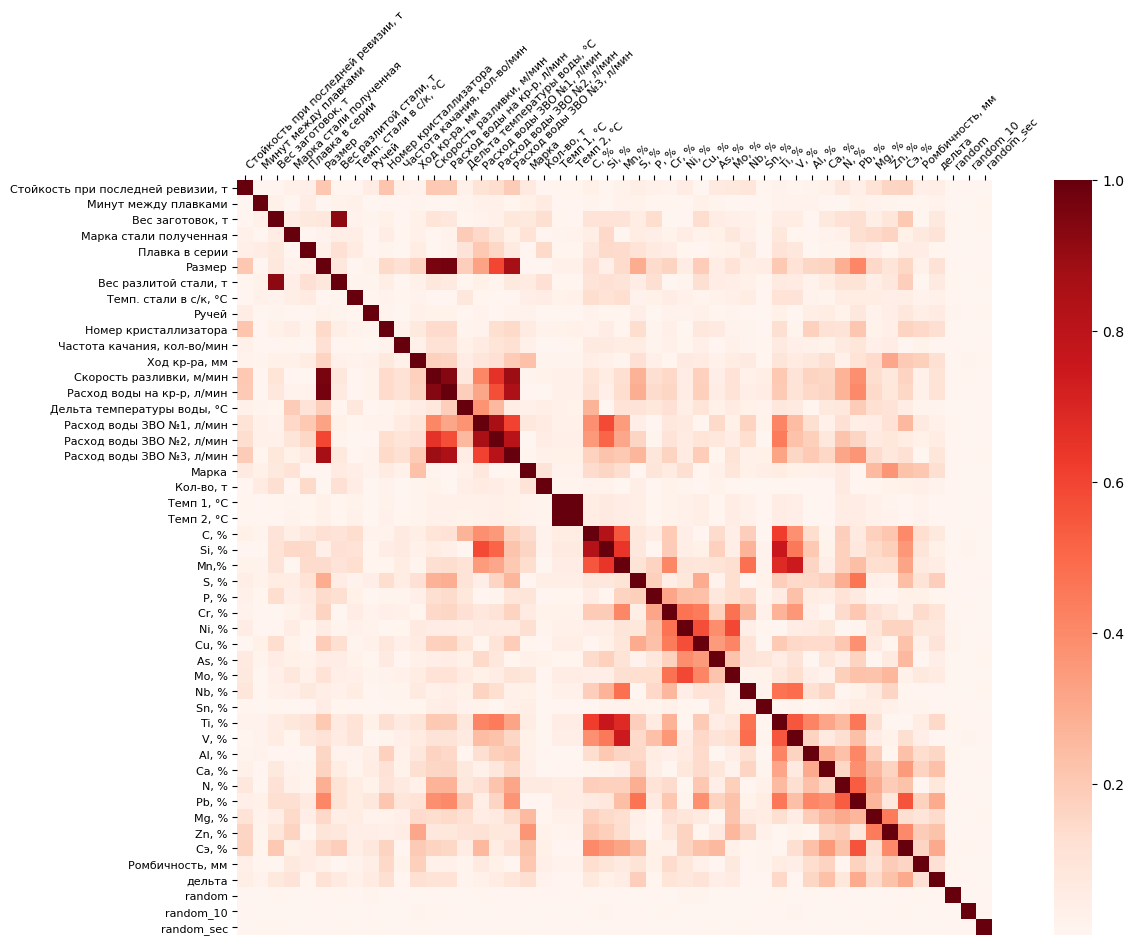

In [11]:
# df_melting.to_clipboard()
df = df_melting.copy().reset_index(drop=True)
key_param = 'Стойкость при последней ревизии, т'

# Для понимания значимости зависимости сгенерируем три случайные параметра
df['random'] = np.random.rand(len(df))
df['random_10'] = np.random.rand(len(df))*10000
df['random_sec'] = list(range(len(df)))
df['random_sec'] = df['random_sec'].sample(frac=1).reset_index(drop=True)

plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True
plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = False

plt.figure(figsize=(16,10), dpi= 100)

df_corr = df[[key_param]+[c for c in df.columns if not c in [key_param]]].corr()
sns.heatmap(df_corr.abs(), cmap='Reds', square=True)

plt.xticks(horizontalalignment='left', fontsize=8, rotation=45)
plt.yticks(fontsize=8);

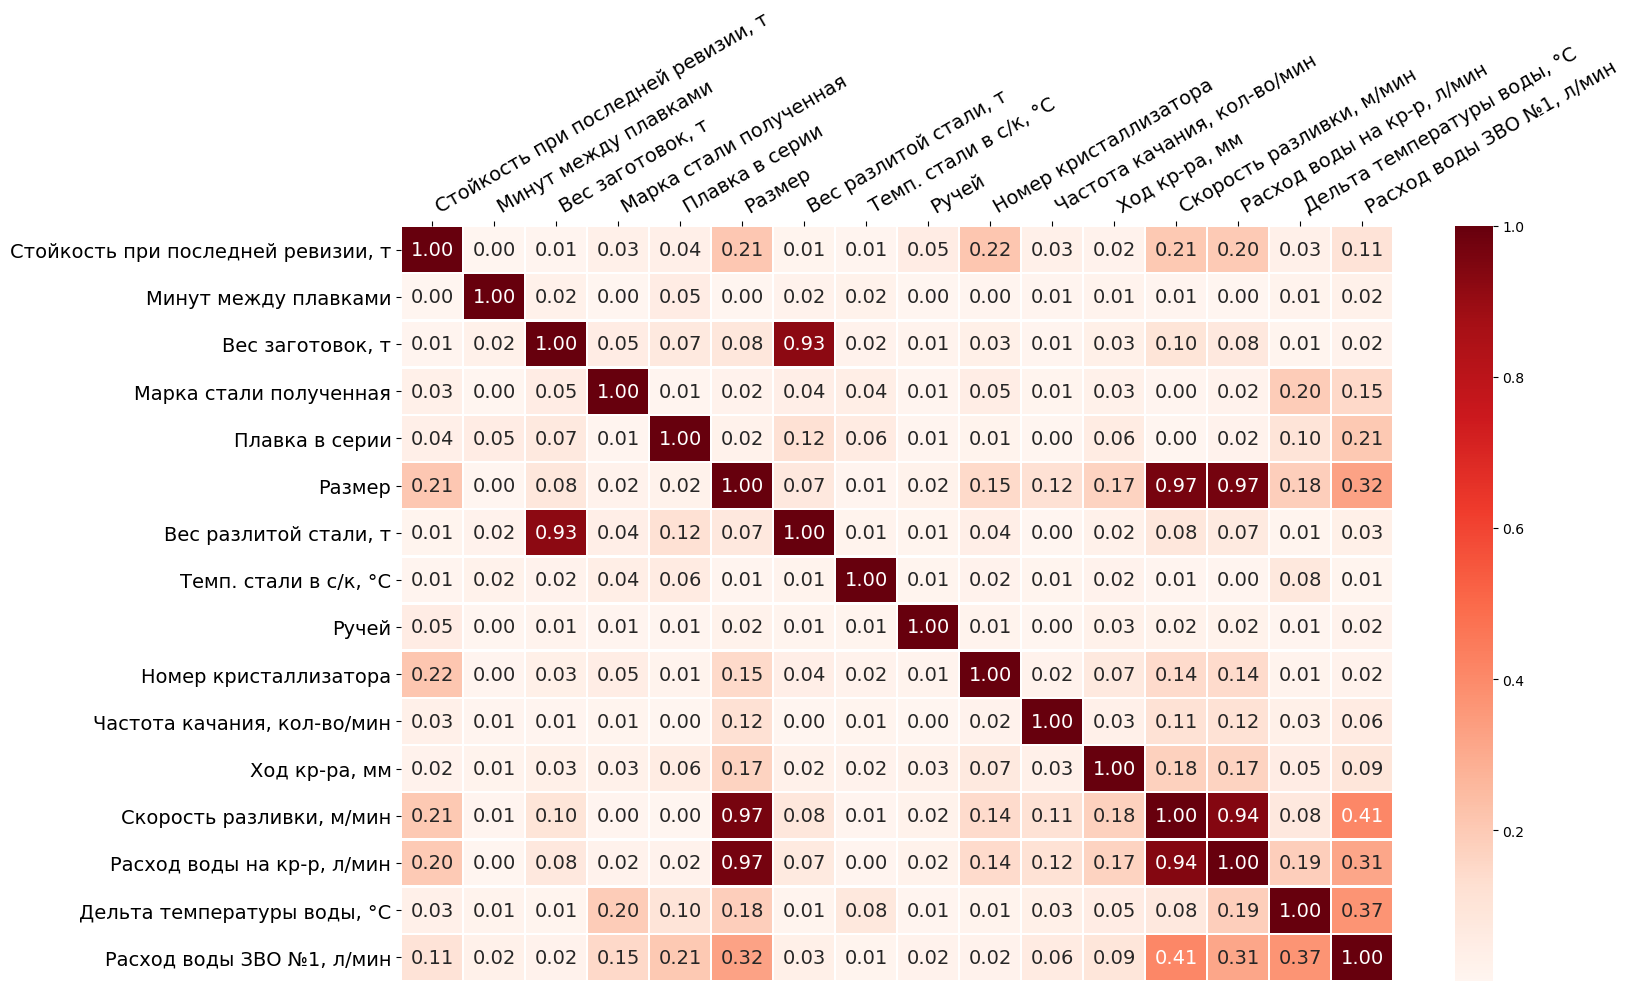

In [12]:
plt.figure(figsize=(16,10), dpi= 100)
df_corr = df[[key_param]+[c for c in df.columns[:len(df.columns)//3] if not c in [key_param]]].corr()
sns.heatmap(df_corr.abs(), annot=True, fmt='.2f', annot_kws={'fontsize':14}, cmap='Reds', linewidths=1)
#, mask=np.triu(df_corr)) colors — https://matplotlib.org/examples/color/colormaps_reference.html
plt.xticks(horizontalalignment='left', fontweight='light', fontsize=14, rotation=30)
plt.yticks(fontweight='light', fontsize=14);

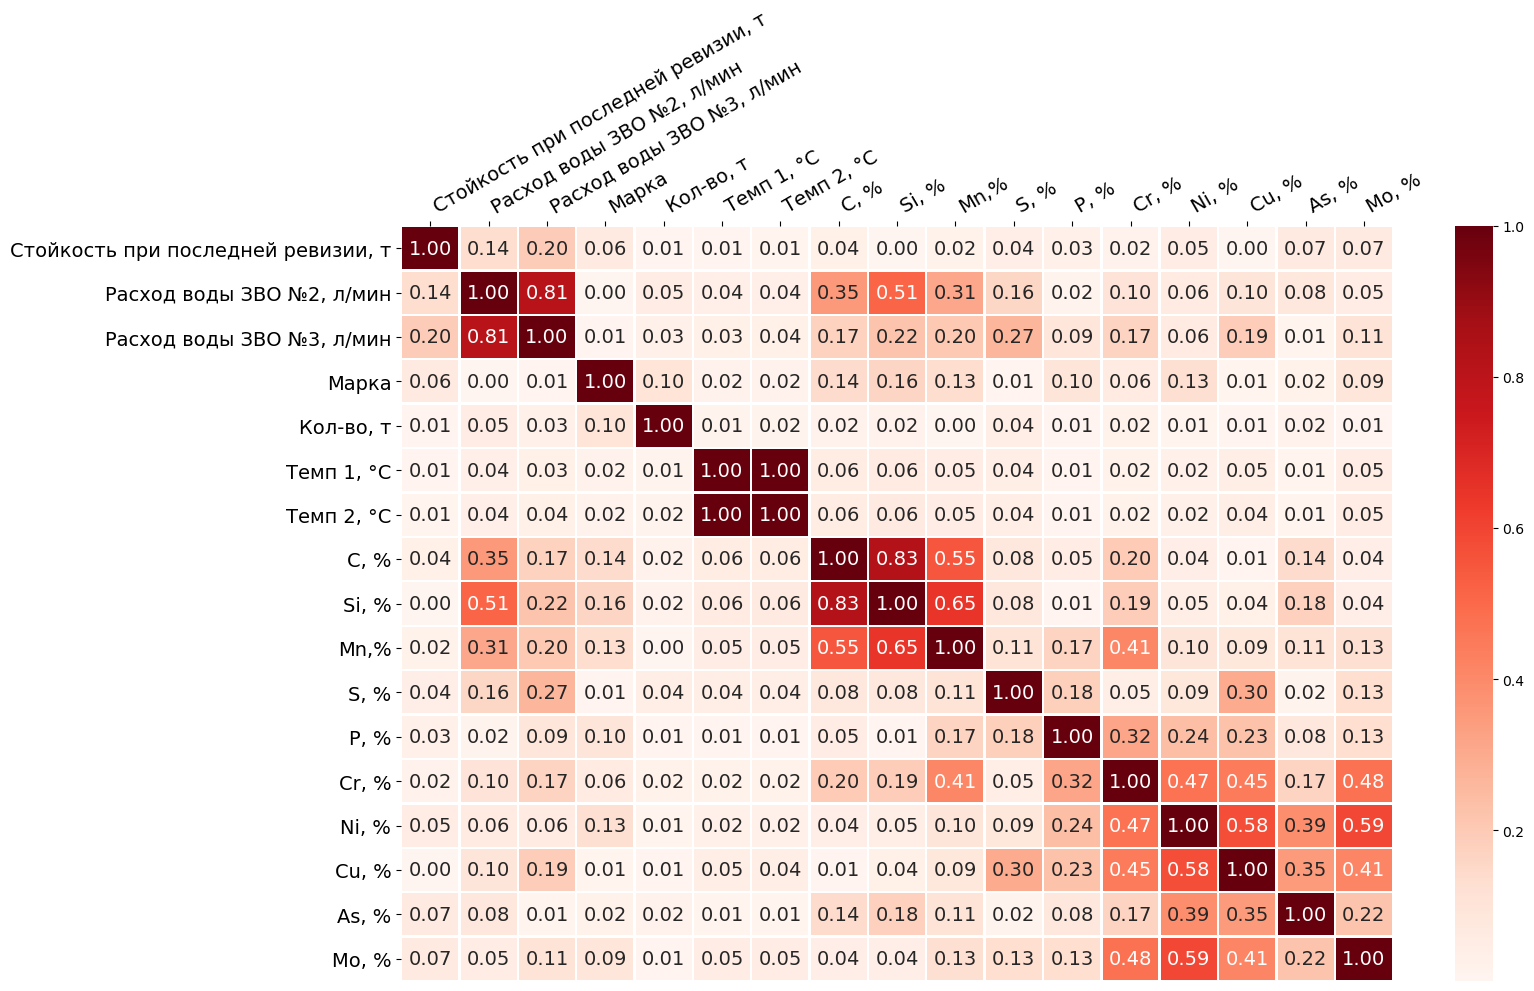

In [13]:
plt.figure(figsize=(16,10), dpi= 100)
df_corr = df[[key_param]+[c for c in df.columns[len(df.columns)//3:len(df.columns)//3*2] if not c in [key_param]]].corr()
sns.heatmap(df_corr.abs(), annot=True, fmt='.2f', annot_kws={'fontsize':14}, cmap='Reds', linewidths=1)
#, mask=np.triu(df_corr)) colors — https://matplotlib.org/examples/color/colormaps_reference.html
plt.xticks(horizontalalignment='left', fontweight='light', fontsize=14, rotation=30)
plt.yticks(fontweight='light', fontsize=14);

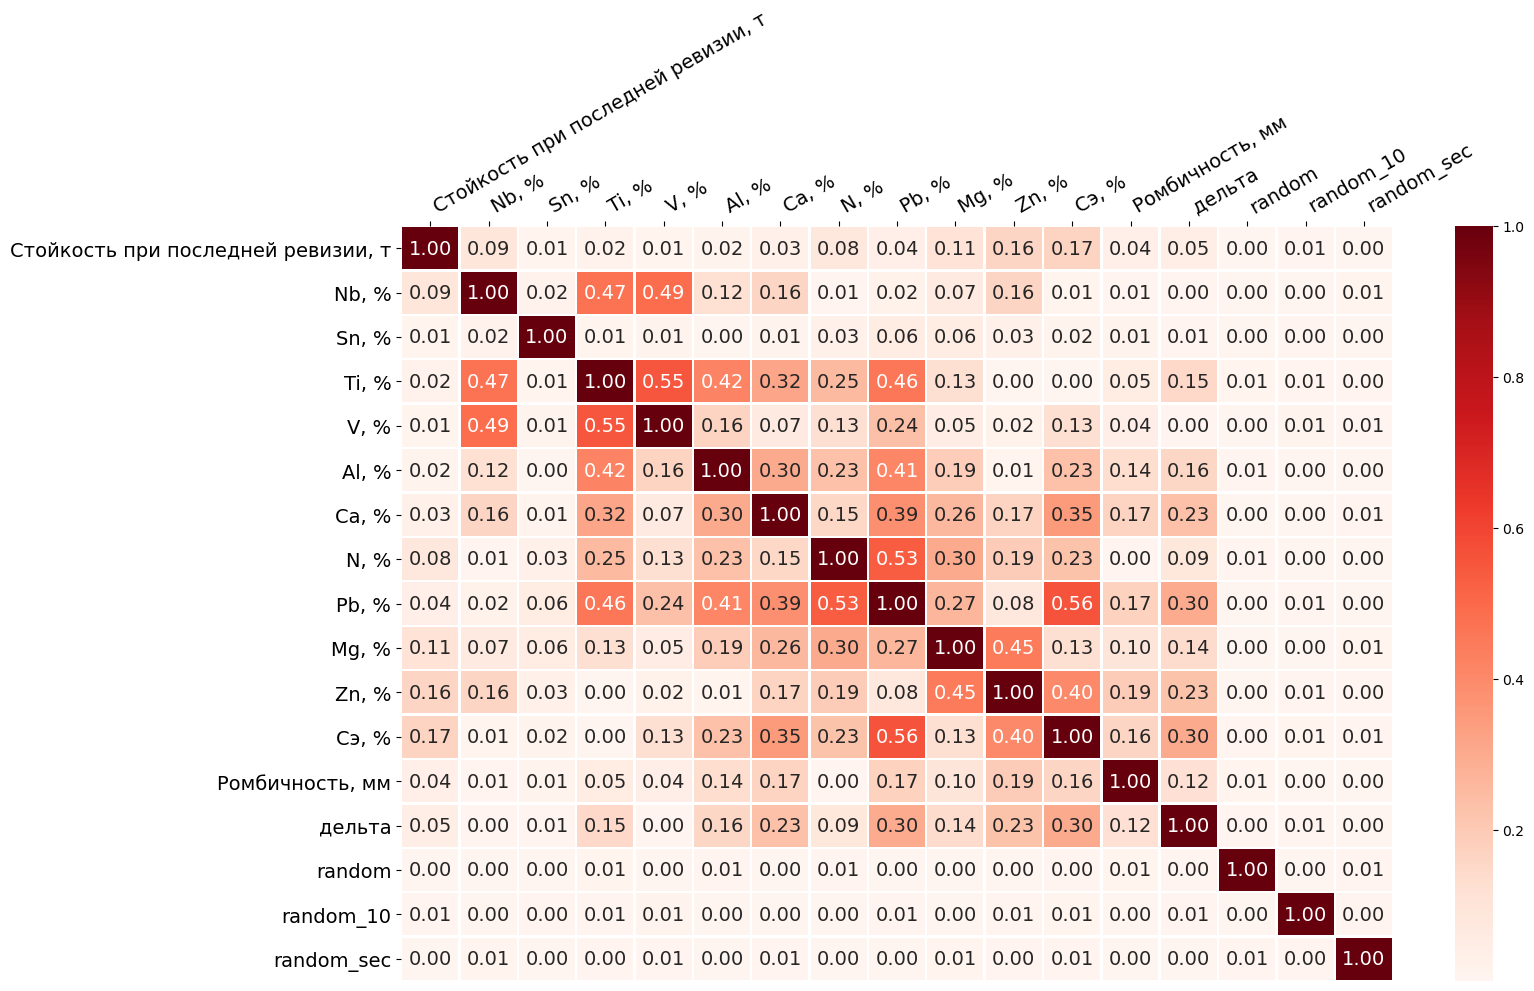

In [14]:
plt.figure(figsize=(16,10), dpi= 100)
df_corr = df[[key_param]+[c for c in df.columns[len(df.columns)//3*2:] if not c in [key_param]]].corr()
sns.heatmap(df_corr.abs(), annot=True, fmt='.2f', annot_kws={'fontsize':14}, cmap='Reds', linewidths=1)
#, mask=np.triu(df_corr)) colors — https://matplotlib.org/examples/color/colormaps_reference.html
plt.xticks(horizontalalignment='left', fontweight='light', fontsize=14, rotation=30)
plt.yticks(fontweight='light', fontsize=14);

## Выборка по размеру гильз 150х150

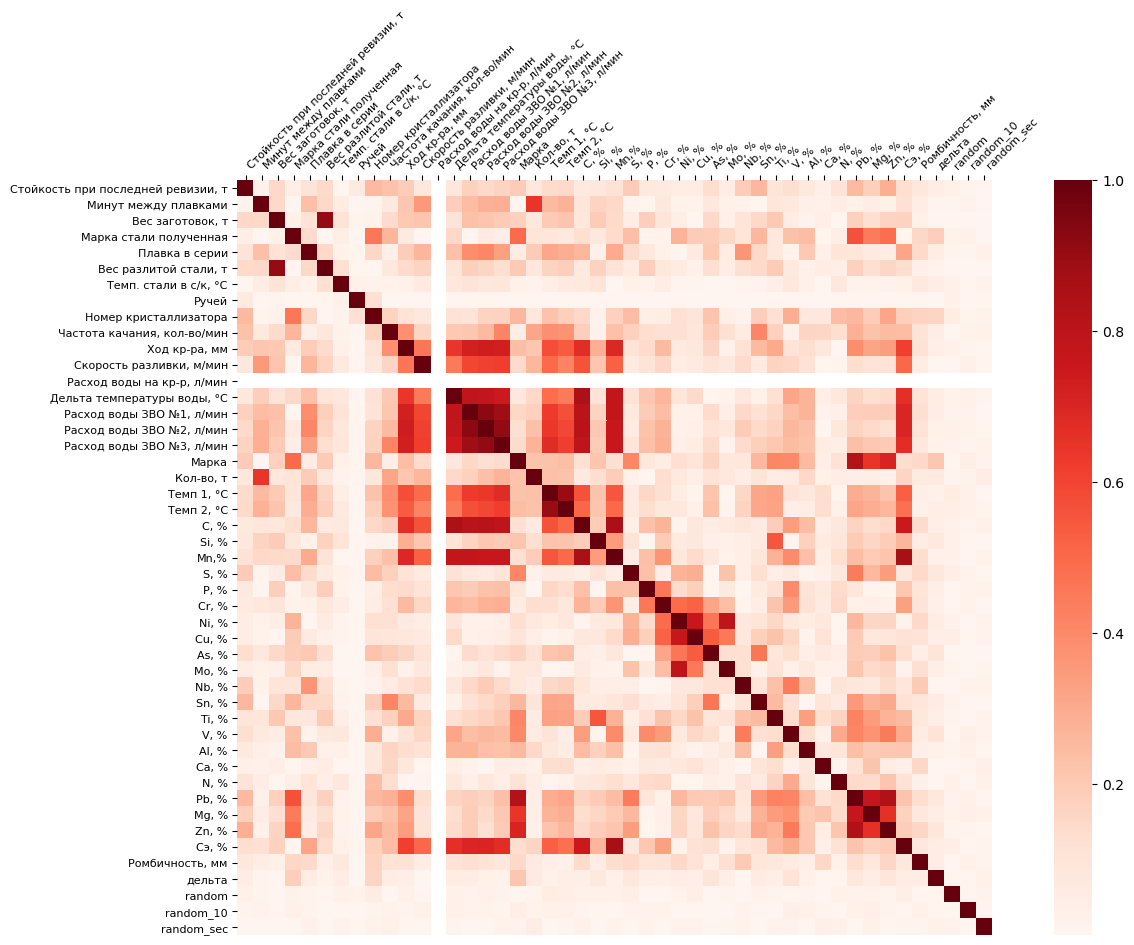

In [15]:
# df_melting.to_clipboard()
df = df_melting.copy()[df_melting['Размер']==150].drop('Размер', axis = 1).reset_index(drop=True)
key_param = 'Стойкость при последней ревизии, т'

# Для понимания значимости зависимости сгенерируем три случайные параметра
df['random'] = np.random.rand(len(df))
df['random_10'] = np.random.rand(len(df))*10000
df['random_sec'] = list(range(len(df)))
df['random_sec'] = df['random_sec'].sample(frac=1).reset_index(drop=True)

plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True
plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = False

plt.figure(figsize=(16,10), dpi= 100)

df_corr = df[[key_param]+[c for c in df.columns if not c in [key_param]]].corr()
sns.heatmap(df_corr.abs(), cmap='Reds', square=True)

plt.xticks(horizontalalignment='left', fontsize=8, rotation=45)
plt.yticks(fontsize=8);

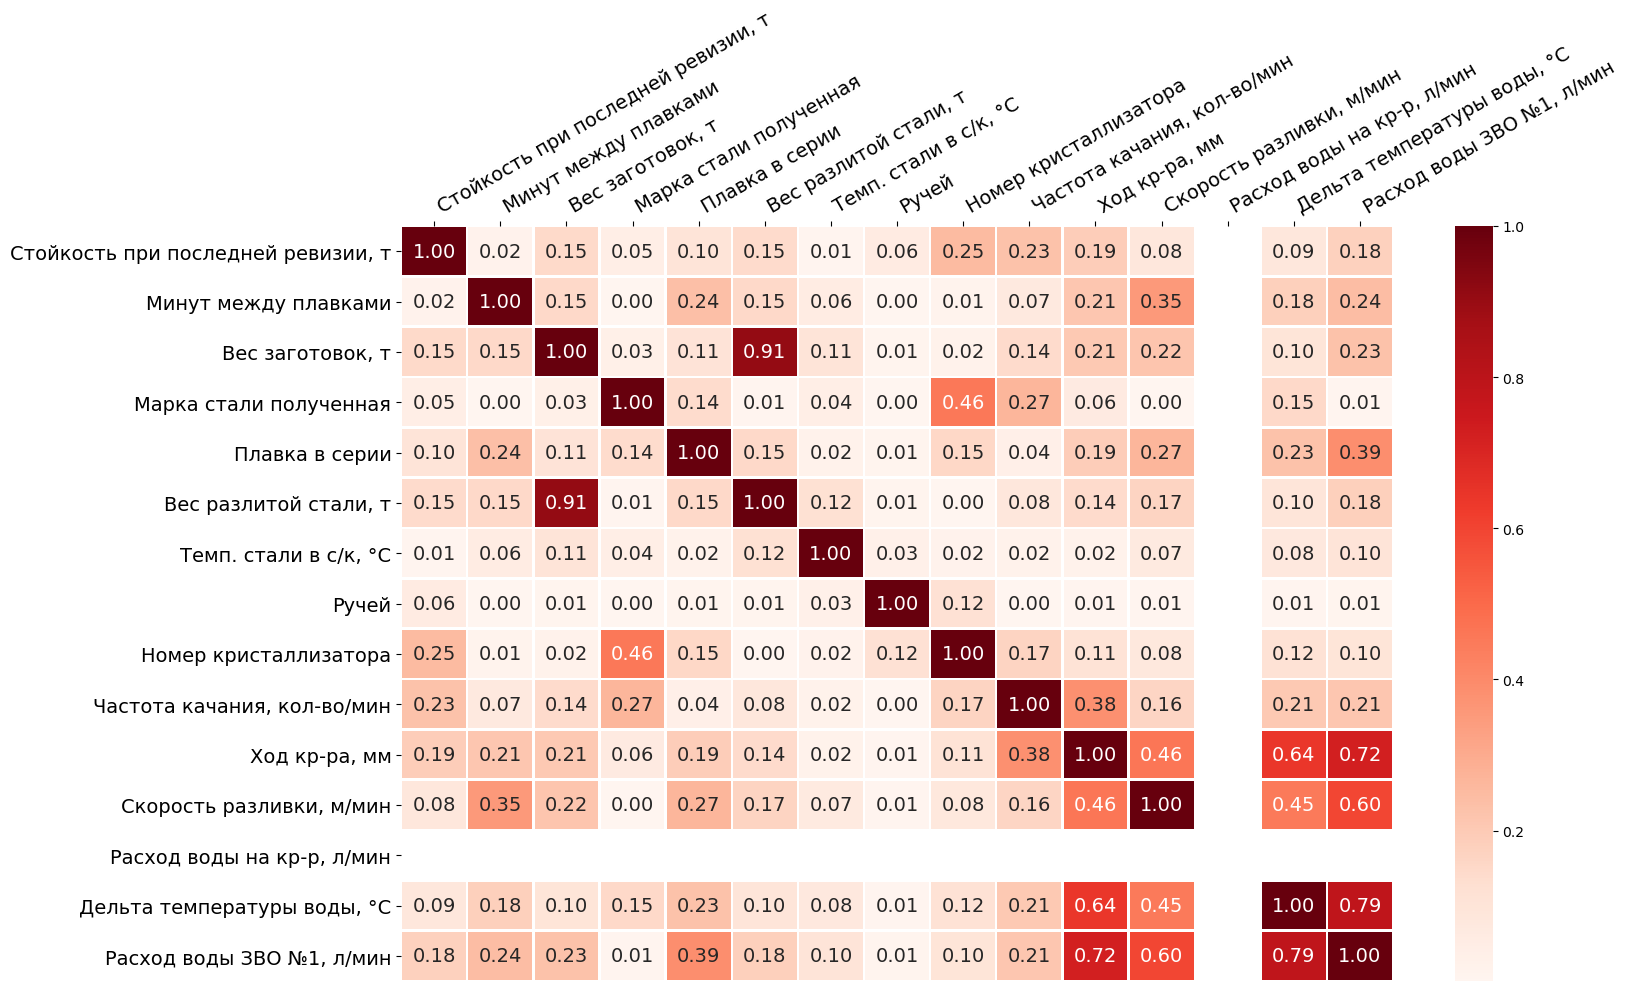

In [16]:
plt.figure(figsize=(16,10), dpi= 100)
df_corr = df[[key_param]+[c for c in df.columns[:len(df.columns)//3] if not c in [key_param]]].corr()
sns.heatmap(df_corr.abs(), annot=True, fmt='.2f', annot_kws={'fontsize':14}, cmap='Reds', linewidths=1)
#, mask=np.triu(df_corr)) colors — https://matplotlib.org/examples/color/colormaps_reference.html
plt.xticks(horizontalalignment='left', fontweight='light', fontsize=14, rotation=30)
plt.yticks(fontweight='light', fontsize=14);

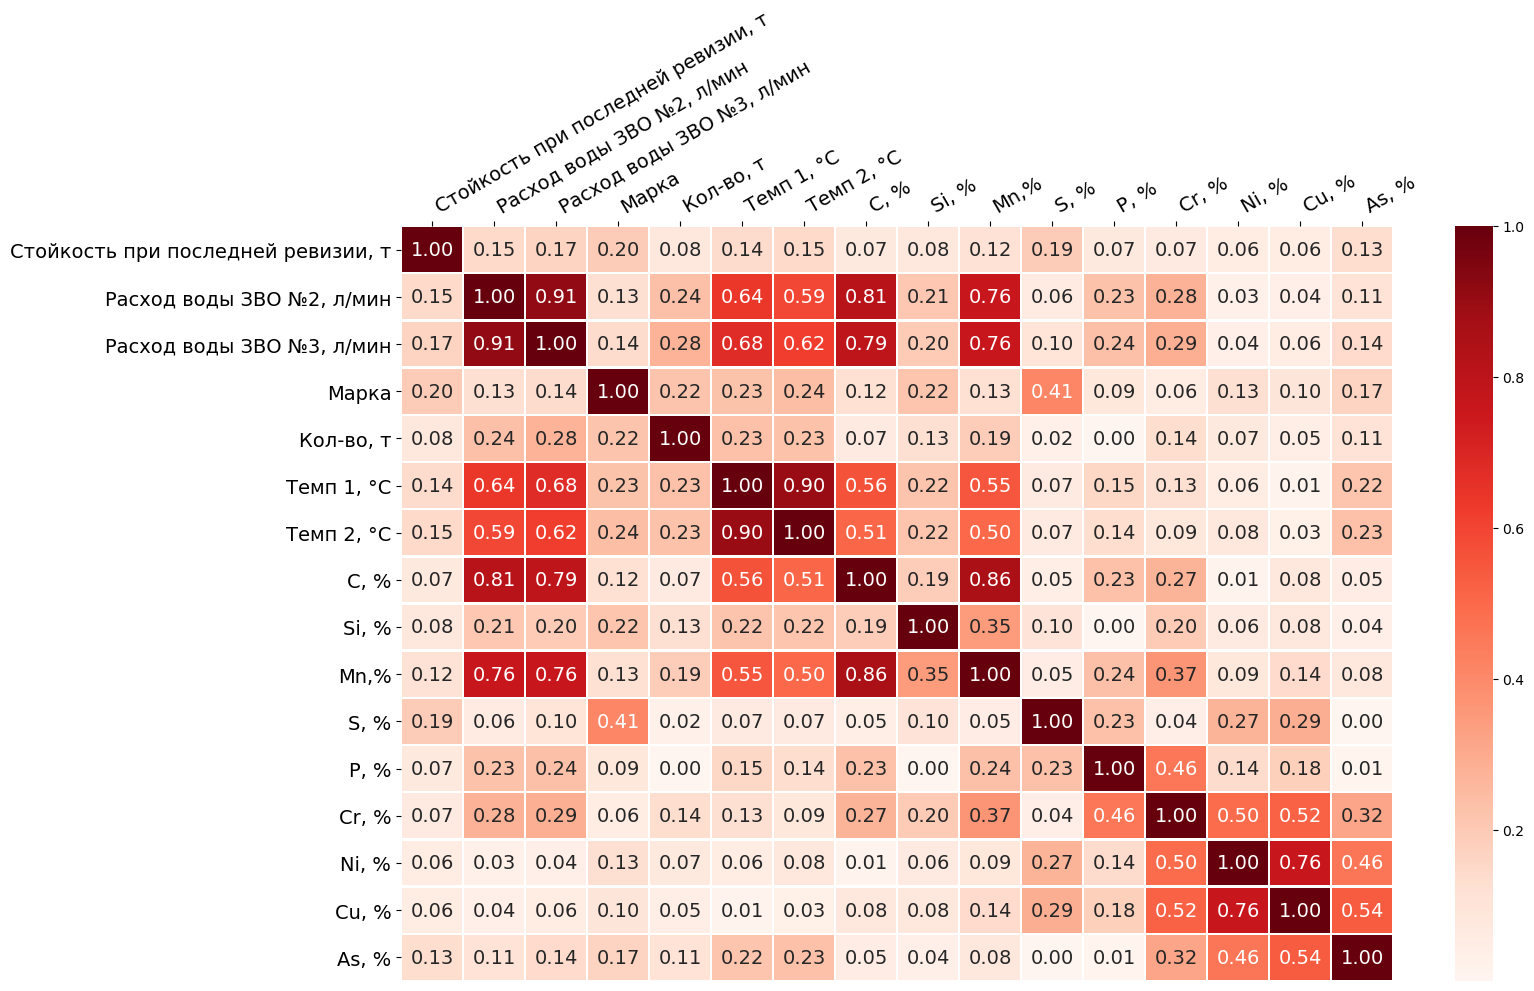

In [17]:
plt.figure(figsize=(16,10), dpi= 100)
df_corr = df[[key_param]+[c for c in df.columns[len(df.columns)//3:len(df.columns)//3*2] if not c in [key_param]]].corr()
sns.heatmap(df_corr.abs(), annot=True, fmt='.2f', annot_kws={'fontsize':14}, cmap='Reds', linewidths=1)
#, mask=np.triu(df_corr)) colors — https://matplotlib.org/examples/color/colormaps_reference.html
plt.xticks(horizontalalignment='left', fontweight='light', fontsize=14, rotation=30)
plt.yticks(fontweight='light', fontsize=14);

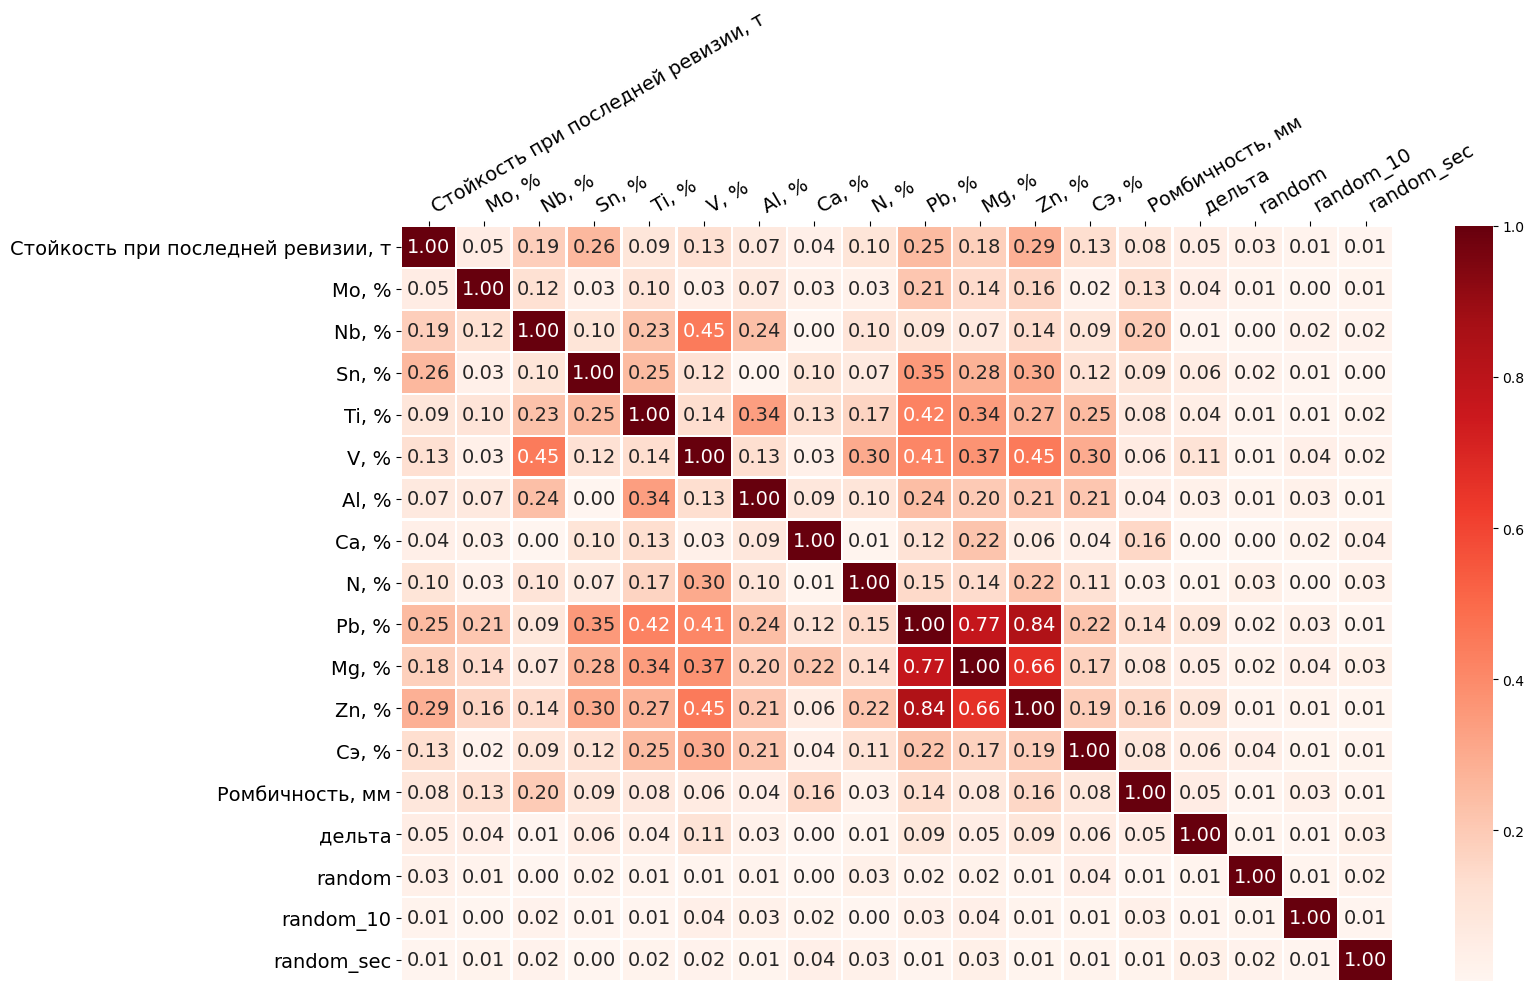

In [18]:
plt.figure(figsize=(16,10), dpi= 100)
df_corr = df[[key_param]+[c for c in df.columns[len(df.columns)//3*2:] if not c in [key_param]]].corr()
sns.heatmap(df_corr.abs(), annot=True, fmt='.2f', annot_kws={'fontsize':14}, cmap='Reds', linewidths=1)
#, mask=np.triu(df_corr)) colors — https://matplotlib.org/examples/color/colormaps_reference.html
plt.xticks(horizontalalignment='left', fontweight='light', fontsize=14, rotation=30)
plt.yticks(fontweight='light', fontsize=14);

## Выборка по размеру гильз 180х180

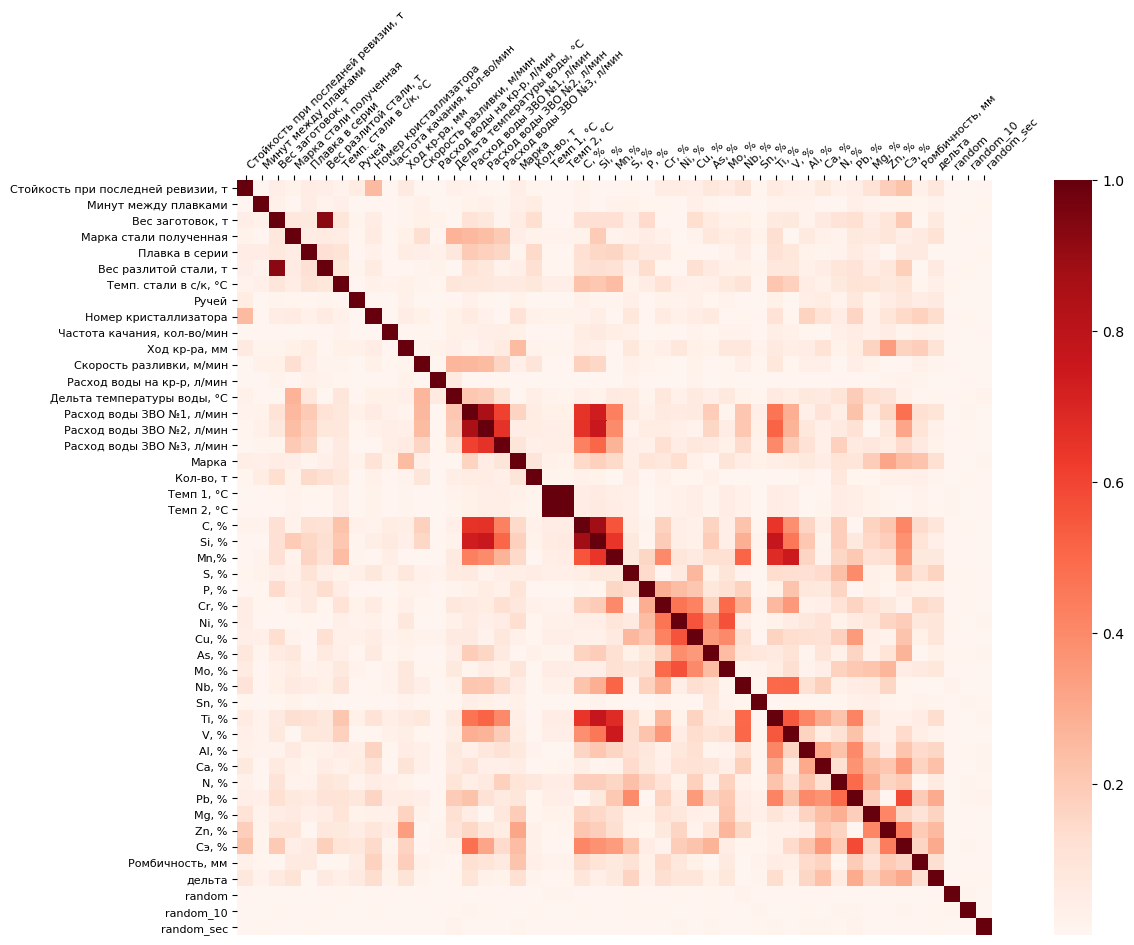

In [19]:
# df_melting.to_clipboard()
df = df_melting.copy()[df_melting['Размер']==180].drop('Размер', axis = 1).reset_index(drop=True)
key_param = 'Стойкость при последней ревизии, т'

# Для понимания значимости зависимости сгенерируем три случайные параметра
df['random'] = np.random.rand(len(df))
df['random_10'] = np.random.rand(len(df))*10000
df['random_sec'] = list(range(len(df)))
df['random_sec'] = df['random_sec'].sample(frac=1).reset_index(drop=True)

plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True
plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = False

plt.figure(figsize=(16,10), dpi= 100)

df_corr = df[[key_param]+[c for c in df.columns if not c in [key_param]]].corr()
sns.heatmap(df_corr.abs(), cmap='Reds', square=True)

plt.xticks(horizontalalignment='left', fontsize=8, rotation=45)
plt.yticks(fontsize=8);

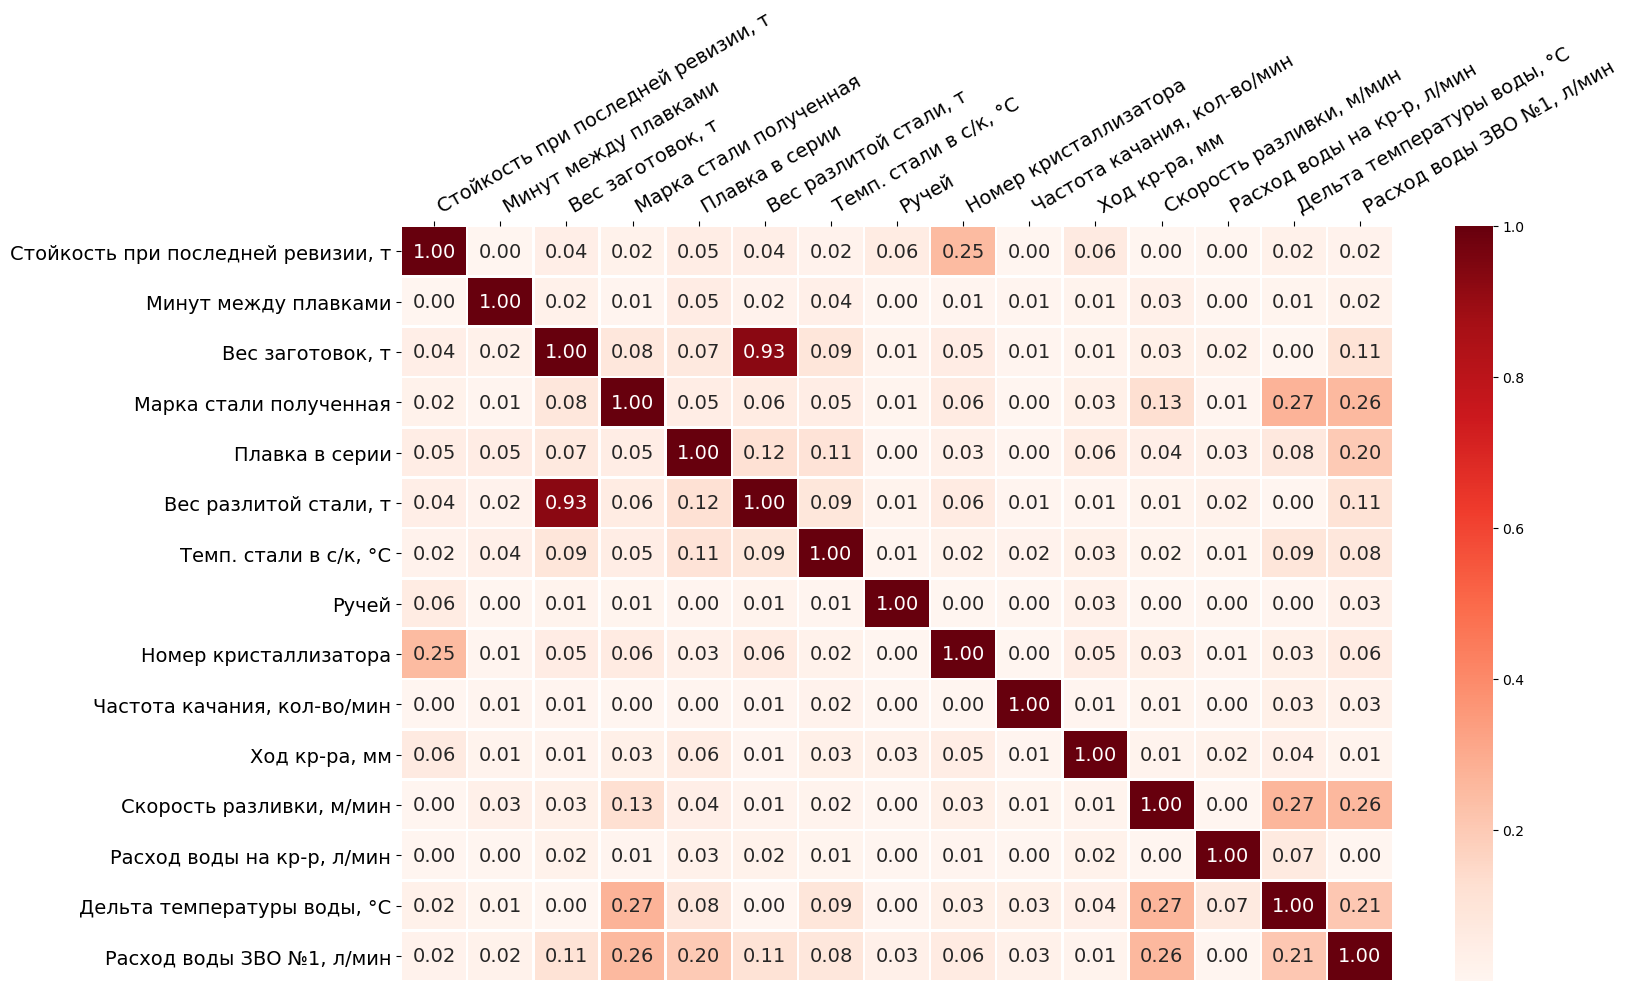

In [20]:
plt.figure(figsize=(16,10), dpi= 100)
df_corr = df[[key_param]+[c for c in df.columns[:len(df.columns)//3] if not c in [key_param]]].corr()
sns.heatmap(df_corr.abs(), annot=True, fmt='.2f', annot_kws={'fontsize':14}, cmap='Reds', linewidths=1)
#, mask=np.triu(df_corr)) colors — https://matplotlib.org/examples/color/colormaps_reference.html
plt.xticks(horizontalalignment='left', fontweight='light', fontsize=14, rotation=30)
plt.yticks(fontweight='light', fontsize=14);

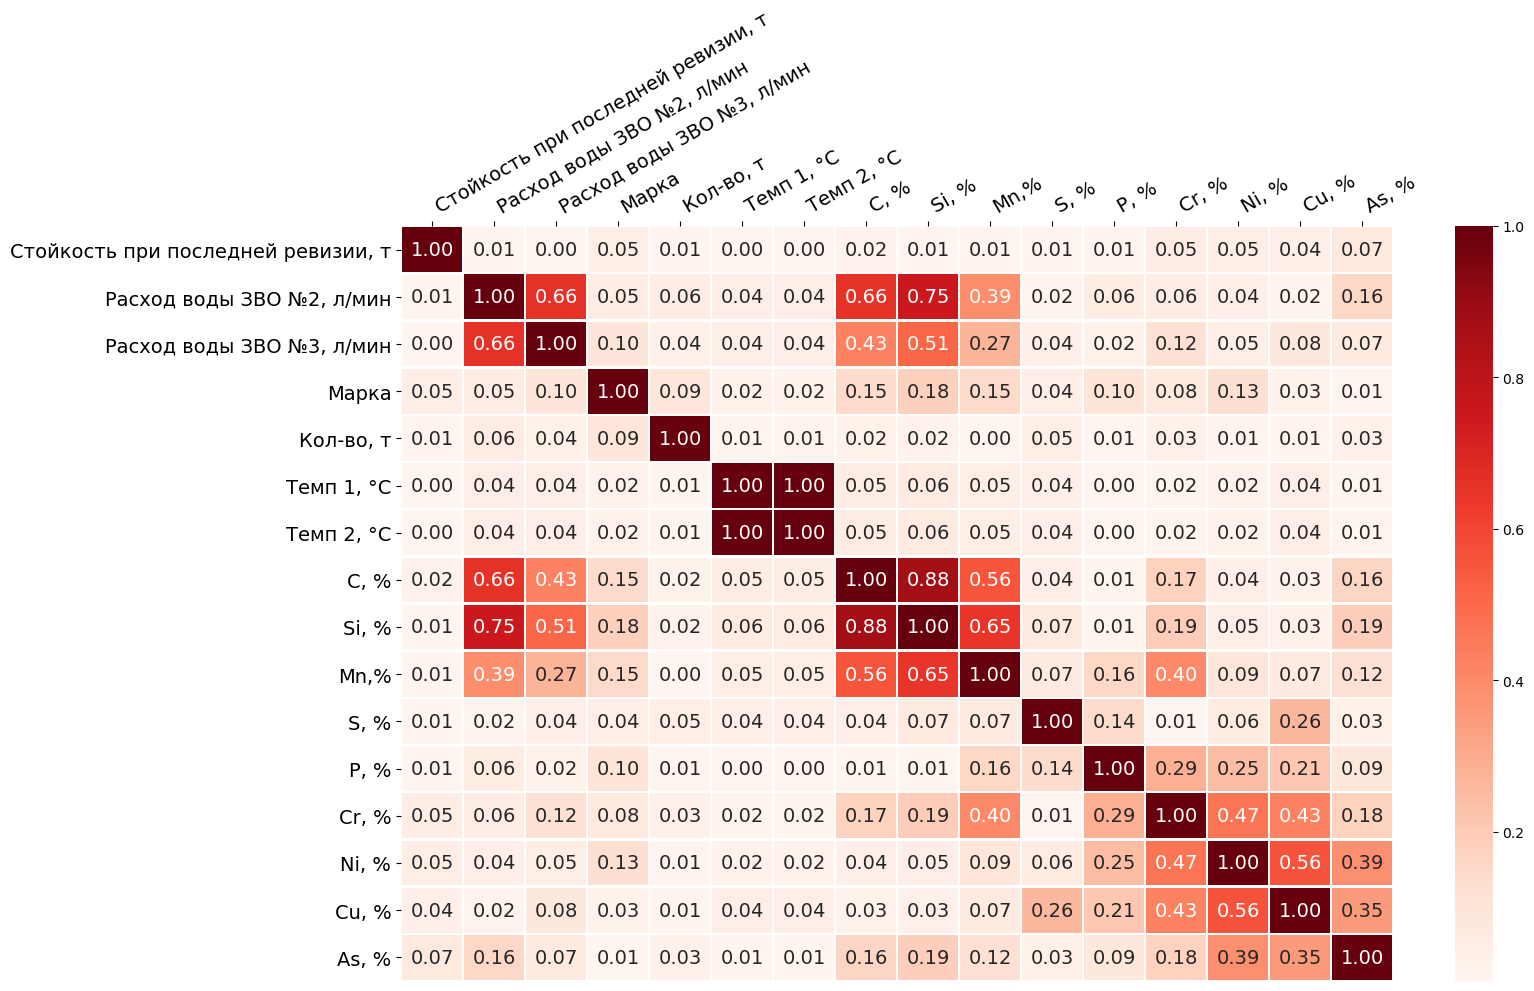

In [21]:
plt.figure(figsize=(16,10), dpi= 100)
df_corr = df[[key_param]+[c for c in df.columns[len(df.columns)//3:len(df.columns)//3*2] if not c in [key_param]]].corr()
sns.heatmap(df_corr.abs(), annot=True, fmt='.2f', annot_kws={'fontsize':14}, cmap='Reds', linewidths=1)
#, mask=np.triu(df_corr)) colors — https://matplotlib.org/examples/color/colormaps_reference.html
plt.xticks(horizontalalignment='left', fontweight='light', fontsize=14, rotation=30)
plt.yticks(fontweight='light', fontsize=14);

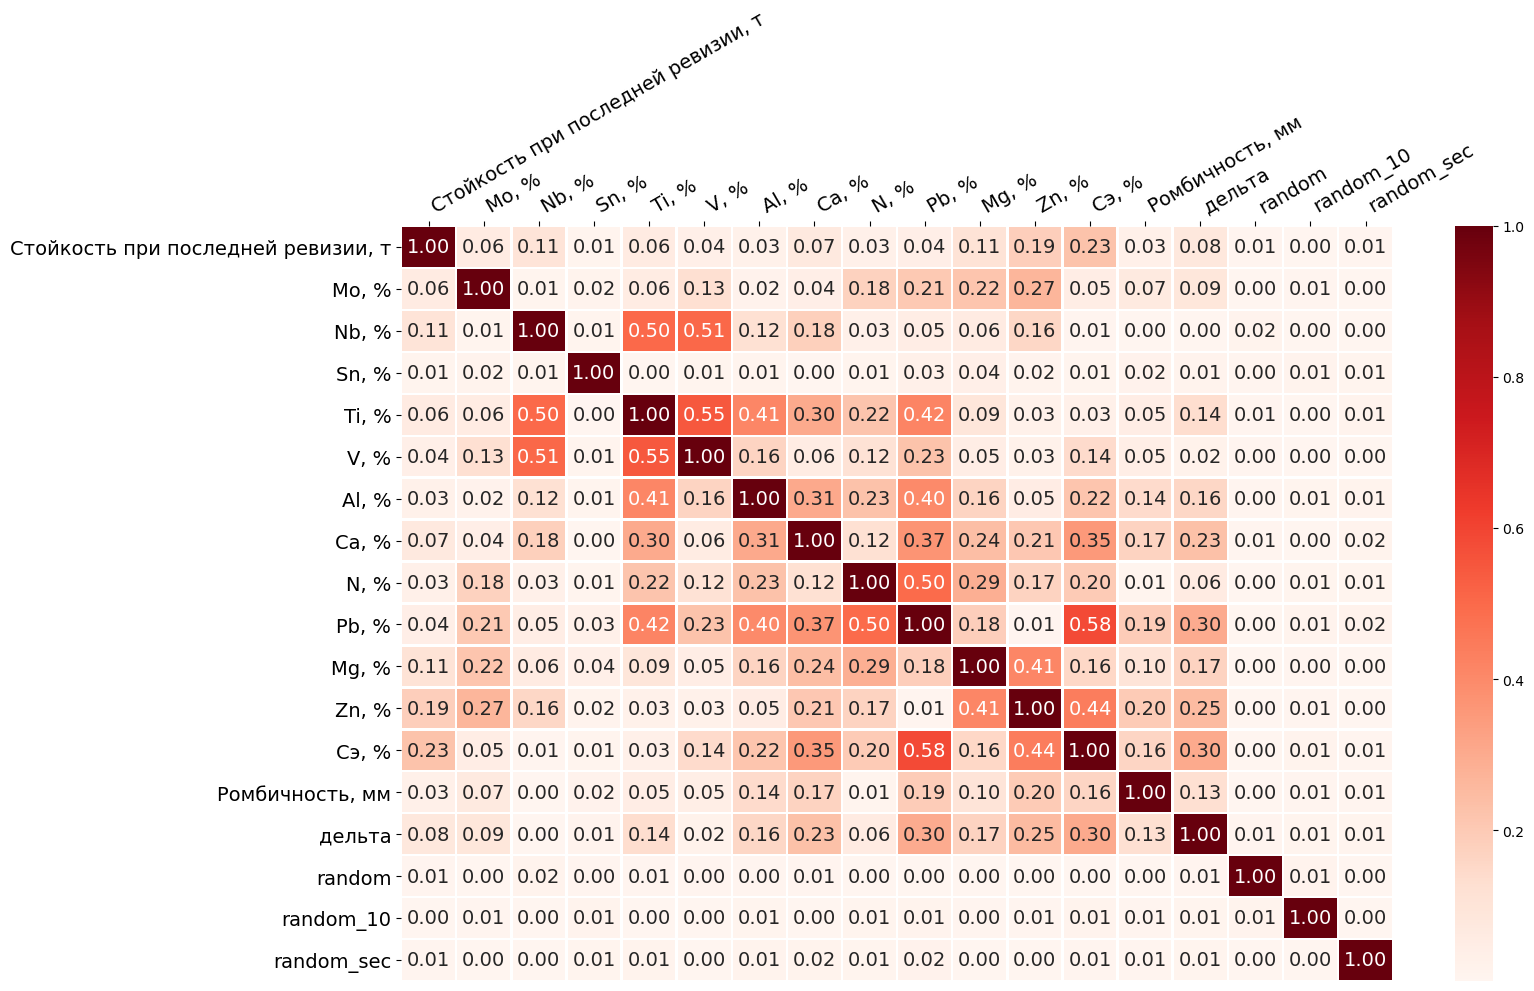

In [22]:
plt.figure(figsize=(16,10), dpi= 100)
df_corr = df[[key_param]+[c for c in df.columns[len(df.columns)//3*2:] if not c in [key_param]]].corr()
sns.heatmap(df_corr.abs(), annot=True, fmt='.2f', annot_kws={'fontsize':14}, cmap='Reds', linewidths=1)
#, mask=np.triu(df_corr)) colors — https://matplotlib.org/examples/color/colormaps_reference.html
plt.xticks(horizontalalignment='left', fontweight='light', fontsize=14, rotation=30)
plt.yticks(fontweight='light', fontsize=14);

# Выявление сложных зависимостей с помощью моделирования
## Модель Random forest

In [23]:
# разобъем список гильз gil_list.unique() на трен и тест
# выделим 40% гильз на валидацию (параметр test_size)
gil_train, gil_test = train_test_split(gil_list.unique(), test_size=0.4, random_state=RANDOM_SEED)

y_train = df_melting[gil_list.isin(gil_train)]['Стойкость при последней ревизии, т'].values
X_train =  df_melting[gil_list.isin(gil_train)].drop('Стойкость при последней ревизии, т', axis=1)

y_test = df_melting[gil_list.isin(gil_test)]['Стойкость при последней ревизии, т'].values
X_test = df_melting[gil_list.isin(gil_test)].drop('Стойкость при последней ревизии, т', axis=1)

len(gil_train), len(gil_test), len(y_train), len(X_train), len(y_test), len(X_test)

(36, 25, 12483, 12483, 12340, 12340)

In [24]:
# Создаём модель, используя модель Random forest
model = RandomForestRegressor(n_estimators=200, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)
# Обучаем модель на тестовом наборе данных
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    5.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    0.0s finished


In [25]:
mae = metrics.mean_absolute_error(y_test,y_pred)
mean = df['Стойкость при последней ревизии, т'].mean()
mae_percent = mae/mean

print('среднее количество метала до выбытия:', mean)
print('средняя ошибка прогноза: ', mae)
print('средняя ошибка в %:', mae_percent*100, '%')

среднее количество метала до выбытия: 9090.661881834136
средняя ошибка прогноза:  3420.3757179902755
средняя ошибка в %: 37.62515603869516 %


<AxesSubplot:>

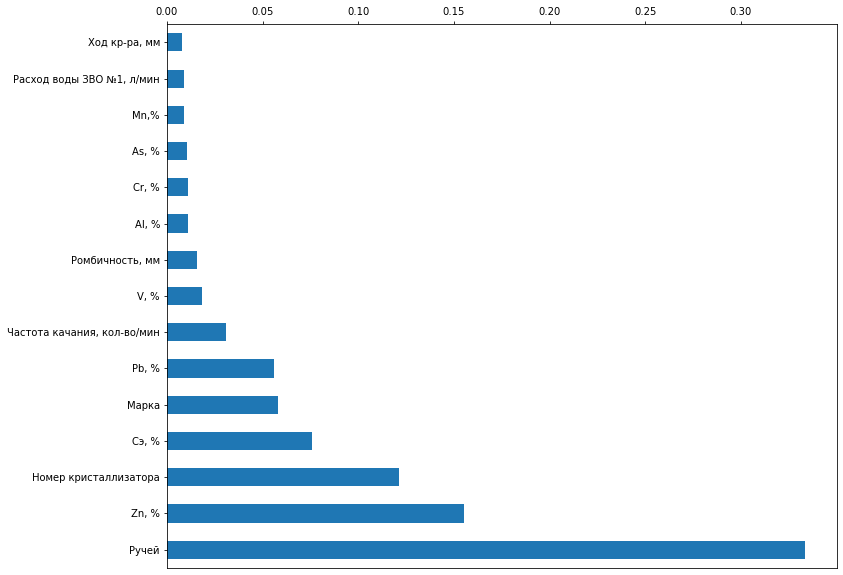

In [27]:
# RandomForestRegressor — выведем самые важные признаки
plt.rcParams['figure.figsize'] = (12,10)
feat_importances = pd.Series(model.feature_importances_, index=X_test.columns)
feat_importances.nlargest(15).plot(kind='barh')

In [ ]:
# разобъем список гильз gil_list.unique() на трен и тест
# выделим 40% гильз на валидацию (параметр test_size)
gil_train, gil_test = train_test_split(gil_list.unique(), test_size=0.4, random_state=RANDOM_SEED)

y_train = df_melting[(df_melting['Размер']==150)&gil_list.isin(gil_train)]['Стойкость при последней ревизии, т'].values
X_train =  df_melting[(df_melting['Размер']==150)&gil_list.isin(gil_train)].drop('Стойкость при последней ревизии, т', axis=1)

y_test = df_melting[(df_melting['Размер']==150)&gil_list.isin(gil_test)]['Стойкость при последней ревизии, т'].values
X_test = df_melting[(df_melting['Размер']==150)&gil_list.isin(gil_test)].drop('Стойкость при последней ревизии, т', axis=1)

len(gil_train), len(gil_test), len(y_train), len(X_train), len(y_test), len(X_test)

In [ ]:
# Создаём модель, используя модель Random forest
model = RandomForestRegressor(n_estimators=200, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)
# Обучаем модель на тестовом наборе данных
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [ ]:
mae = metrics.mean_absolute_error(y_test,y_pred)
mean = df['Стойкость при последней ревизии, т'].mean()
mae_percent = mae/mean

print('среднее количество метала до выбытия:', mean)
print('средняя ошибка прогноза: ', mae)
print('средняя ошибка в %:', mae_percent*100, '%')

In [ ]:
# RandomForestRegressor — выведем самые важные признаки
plt.rcParams['figure.figsize'] = (12,10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

In [ ]:
# разобъем список гильз gil_list.unique() на трен и тест
# выделим 40% гильз на валидацию (параметр test_size)
gil_train, gil_test = train_test_split(gil_list.unique(), test_size=0.4, random_state=RANDOM_SEED)

y_train = df_melting[(df_melting['Размер']==180)&gil_list.isin(gil_train)]['Стойкость при последней ревизии, т'].values
X_train =  df_melting[(df_melting['Размер']==180)&gil_list.isin(gil_train)].drop('Стойкость при последней ревизии, т', axis=1)

y_test = df_melting[(df_melting['Размер']==180)&gil_list.isin(gil_test)]['Стойкость при последней ревизии, т'].values
X_test = df_melting[(df_melting['Размер']==180)&gil_list.isin(gil_test)].drop('Стойкость при последней ревизии, т', axis=1)

len(gil_train), len(gil_test), len(y_train), len(X_train), len(y_test), len(X_test)

In [ ]:
# Создаём модель, используя модель Random forest
model = RandomForestRegressor(n_estimators=200, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)
# Обучаем модель на тестовом наборе данных
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [ ]:
mae = metrics.mean_absolute_error(y_test,y_pred)
mean = df['Стойкость при последней ревизии, т'].mean()
mae_percent = mae/mean

print('среднее количество метала до выбытия:', mean)
print('средняя ошибка прогноза: ', mae)
print('средняя ошибка в %:', mae_percent*100, '%')

In [ ]:
# RandomForestRegressor — выведем самые важные признаки
plt.rcParams['figure.figsize'] = (12,10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

In [ ]:
# Разбиваем набор данных на тренировочный и тестовый
y = df_melting['Стойкость при последней ревизии, т'].values
X = df_melting.drop('Стойкость при последней ревизии, т', axis=1)

# Воспользуемся специальной функцие train_test_split для разбивки тестовых данных
# выделим 40% гильз на валидацию (параметр test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=RANDOM_SEED)
X_train

In [ ]:
# Создаём модель, используя метод Random forest
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

In [ ]:
# Обучаем модель на тестовом наборе данных
model.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = model.predict(X_test)

In [ ]:
mae = metrics.mean_absolute_error(y_test,y_pred)
mean = df['Стойкость при последней ревизии, т'].mean()
mae_percent = mae/mean

print('среднее количество метала до выбытия:', mean)
print('средняя ошибка прогноза: ', mae)
print('средняя ошибка в %:', mae_percent*100, '%')

In [ ]:
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели
plt.rcParams['figure.figsize'] = (12,10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')